In [1]:
# Importing Required Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# Reading the CSV File & labeling the 'unknown as NaN values'
bank_df = pd.read_csv('bank_additional_full.csv',sep=';',na_values='unknown')

In [3]:
bank_df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Examining the Dataset


In [4]:
# Printing the info of the dataset.
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Examining the frequency distribution of the Class label columns.
bank_df['y'].value_counts(dropna=False)

no     36548
yes     4640
Name: y, dtype: int64

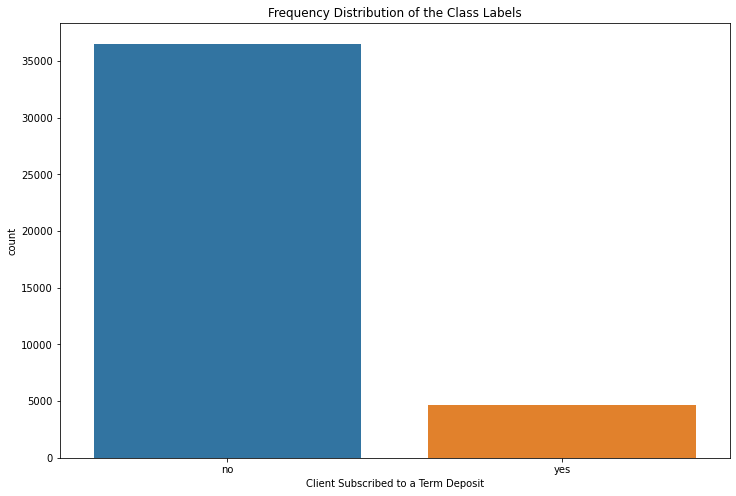

In [6]:
# Plotting the Response variable y
plt.figure(figsize=(12,8))
sns.countplot(x='y',data=bank_df)
plt.xlabel('Client Subscribed to a Term Deposit')
plt.title('Frequency Distribution of the Class Labels')
plt.show()

### From the above plot we can clearly make out that the dataset is highly imbalanced. 

In [7]:
# Converting the Response variable y values to binary numbers 0 & 1
bank_df['y'] = bank_df['y'].map({'no':0,'yes':1})

In [8]:
# Standardizing the Column Names
bank_df.columns = bank_df.columns.str.strip().str.replace('.','_')

In [9]:
# Examining the Column name change result
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


###  Examining the Null Values in the dataset.

In [10]:
# Determining  No. of Null Values in various columns of the dataset
bank_df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

In [11]:
# Determining the % of null values in each column of the dataset
bank_df.isnull().mean()*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp_var_rate       0.000000
cons_price_idx     0.000000
cons_conf_idx      0.000000
euribor3m          0.000000
nr_employed        0.000000
y                  0.000000
dtype: float64

### Analyzing Missing Values in the dataset.

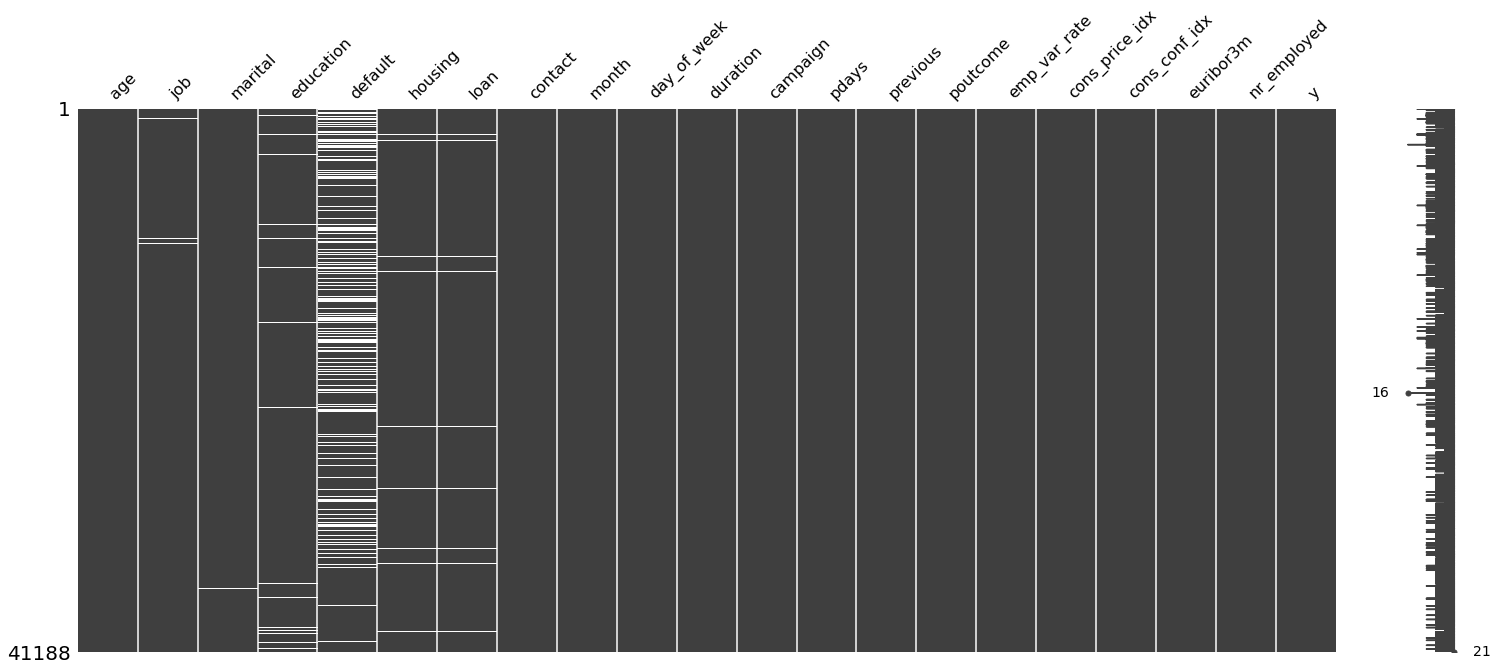

In [12]:
# Analyzing the missing Values in various columns
import missingno as msno
msno.matrix(bank_df)
plt.show()

### From above graph we can see that all the missing values are in categorical columns. And around 21% of the values are missing in the default column. Further the missing values in various columns seems to be highly correlated.

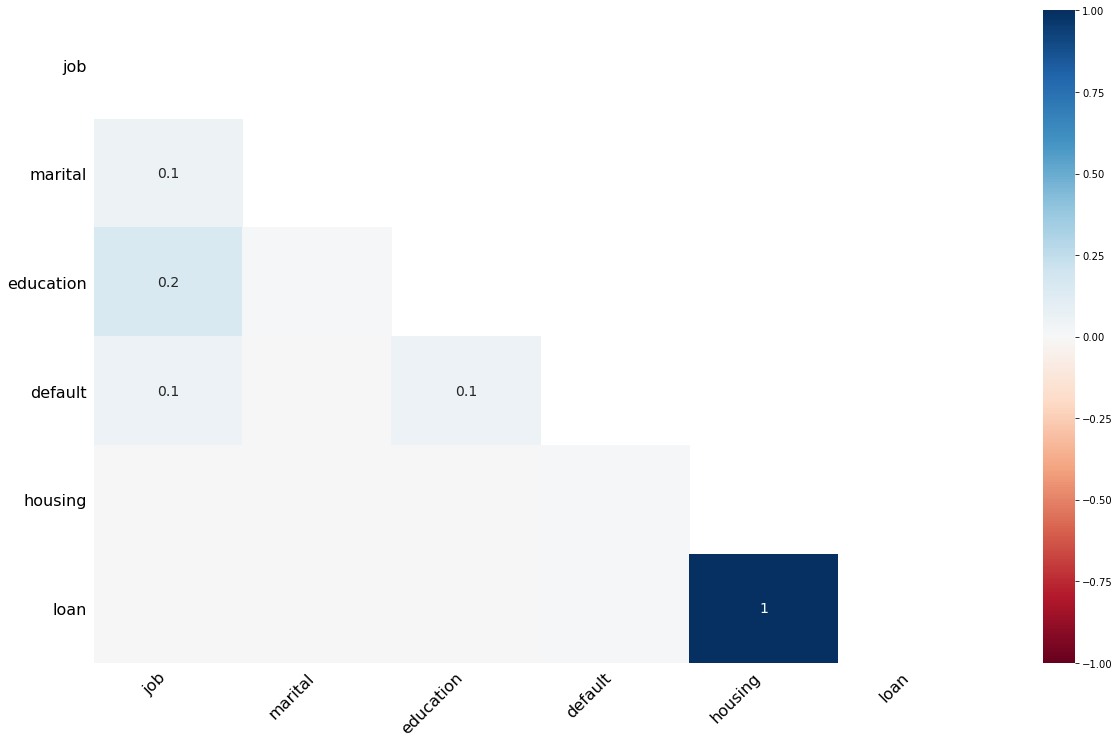

In [13]:
# Visualizing the heatmap of the correlations of the missing values
msno.heatmap(bank_df)
plt.show()

### From above we can clearly view that Missing values in housing (housing loan) and loan (personal loan) columns are perfectly correlated . There might be an underlying reason for it. While the the mssing values in other columns are not that correlated with each other.

## Examining the Numerical columns of the dataset

In [14]:
#Segregating the Numerical Columns of the dataset
num_df = bank_df.select_dtypes(include=np.number)

In [15]:
# Checking the numerical dataset
num_df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [16]:
# Making Sure that there are no missing values in the numerical columns
num_df.isna().sum().sum()

0

In [17]:
# Converting the duration of the calls from seconds to mins.
num_df['duration'] = (num_df['duration']/60).round(2)

In [18]:
# Segregating Numerical Features (X) from the response variable (y)
X_num = num_df.drop(columns='y')

In [19]:
# Checking the information about the Numerical Columns.
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  float64
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp_var_rate    41188 non-null  float64
 6   cons_price_idx  41188 non-null  float64
 7   cons_conf_idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr_employed     41188 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 3.1 MB


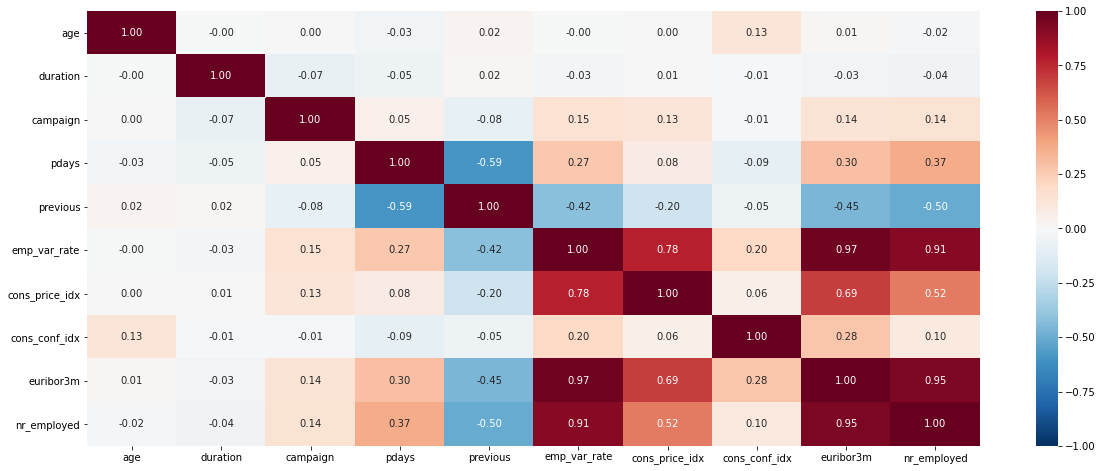

In [20]:
# Checking for the correlations between different numerical columns
plt.figure(figsize=(20,8))
sns.heatmap(X_num.corr(),fmt='.2f',annot=True,cmap='RdBu_r',vmin=-1,vmax=1)
plt.show()

### From above we can clearly visualize that various socio economic variables such as nr_employed, euribor are highly correlated with each other. We may need to remove some of them. But let's try if  mean centering each column reduces multi-collinearity.

In [21]:
X_num_cen = X_num-X_num.mean()

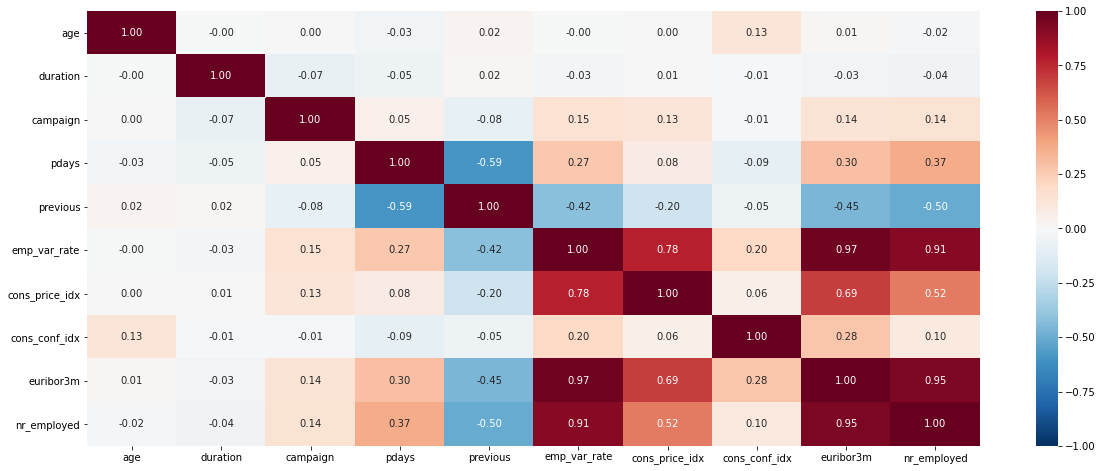

In [22]:
# Checking for the correlations between different mean centered numerical columns
plt.figure(figsize=(20,8))
sns.heatmap(X_num_cen.corr(),fmt='.2f',annot=True,cmap='RdBu_r',vmin=-1,vmax=1)
plt.show()

### From the above graph , as expected  we can clearly see that mean centering doesn't take care of multicollineraity.

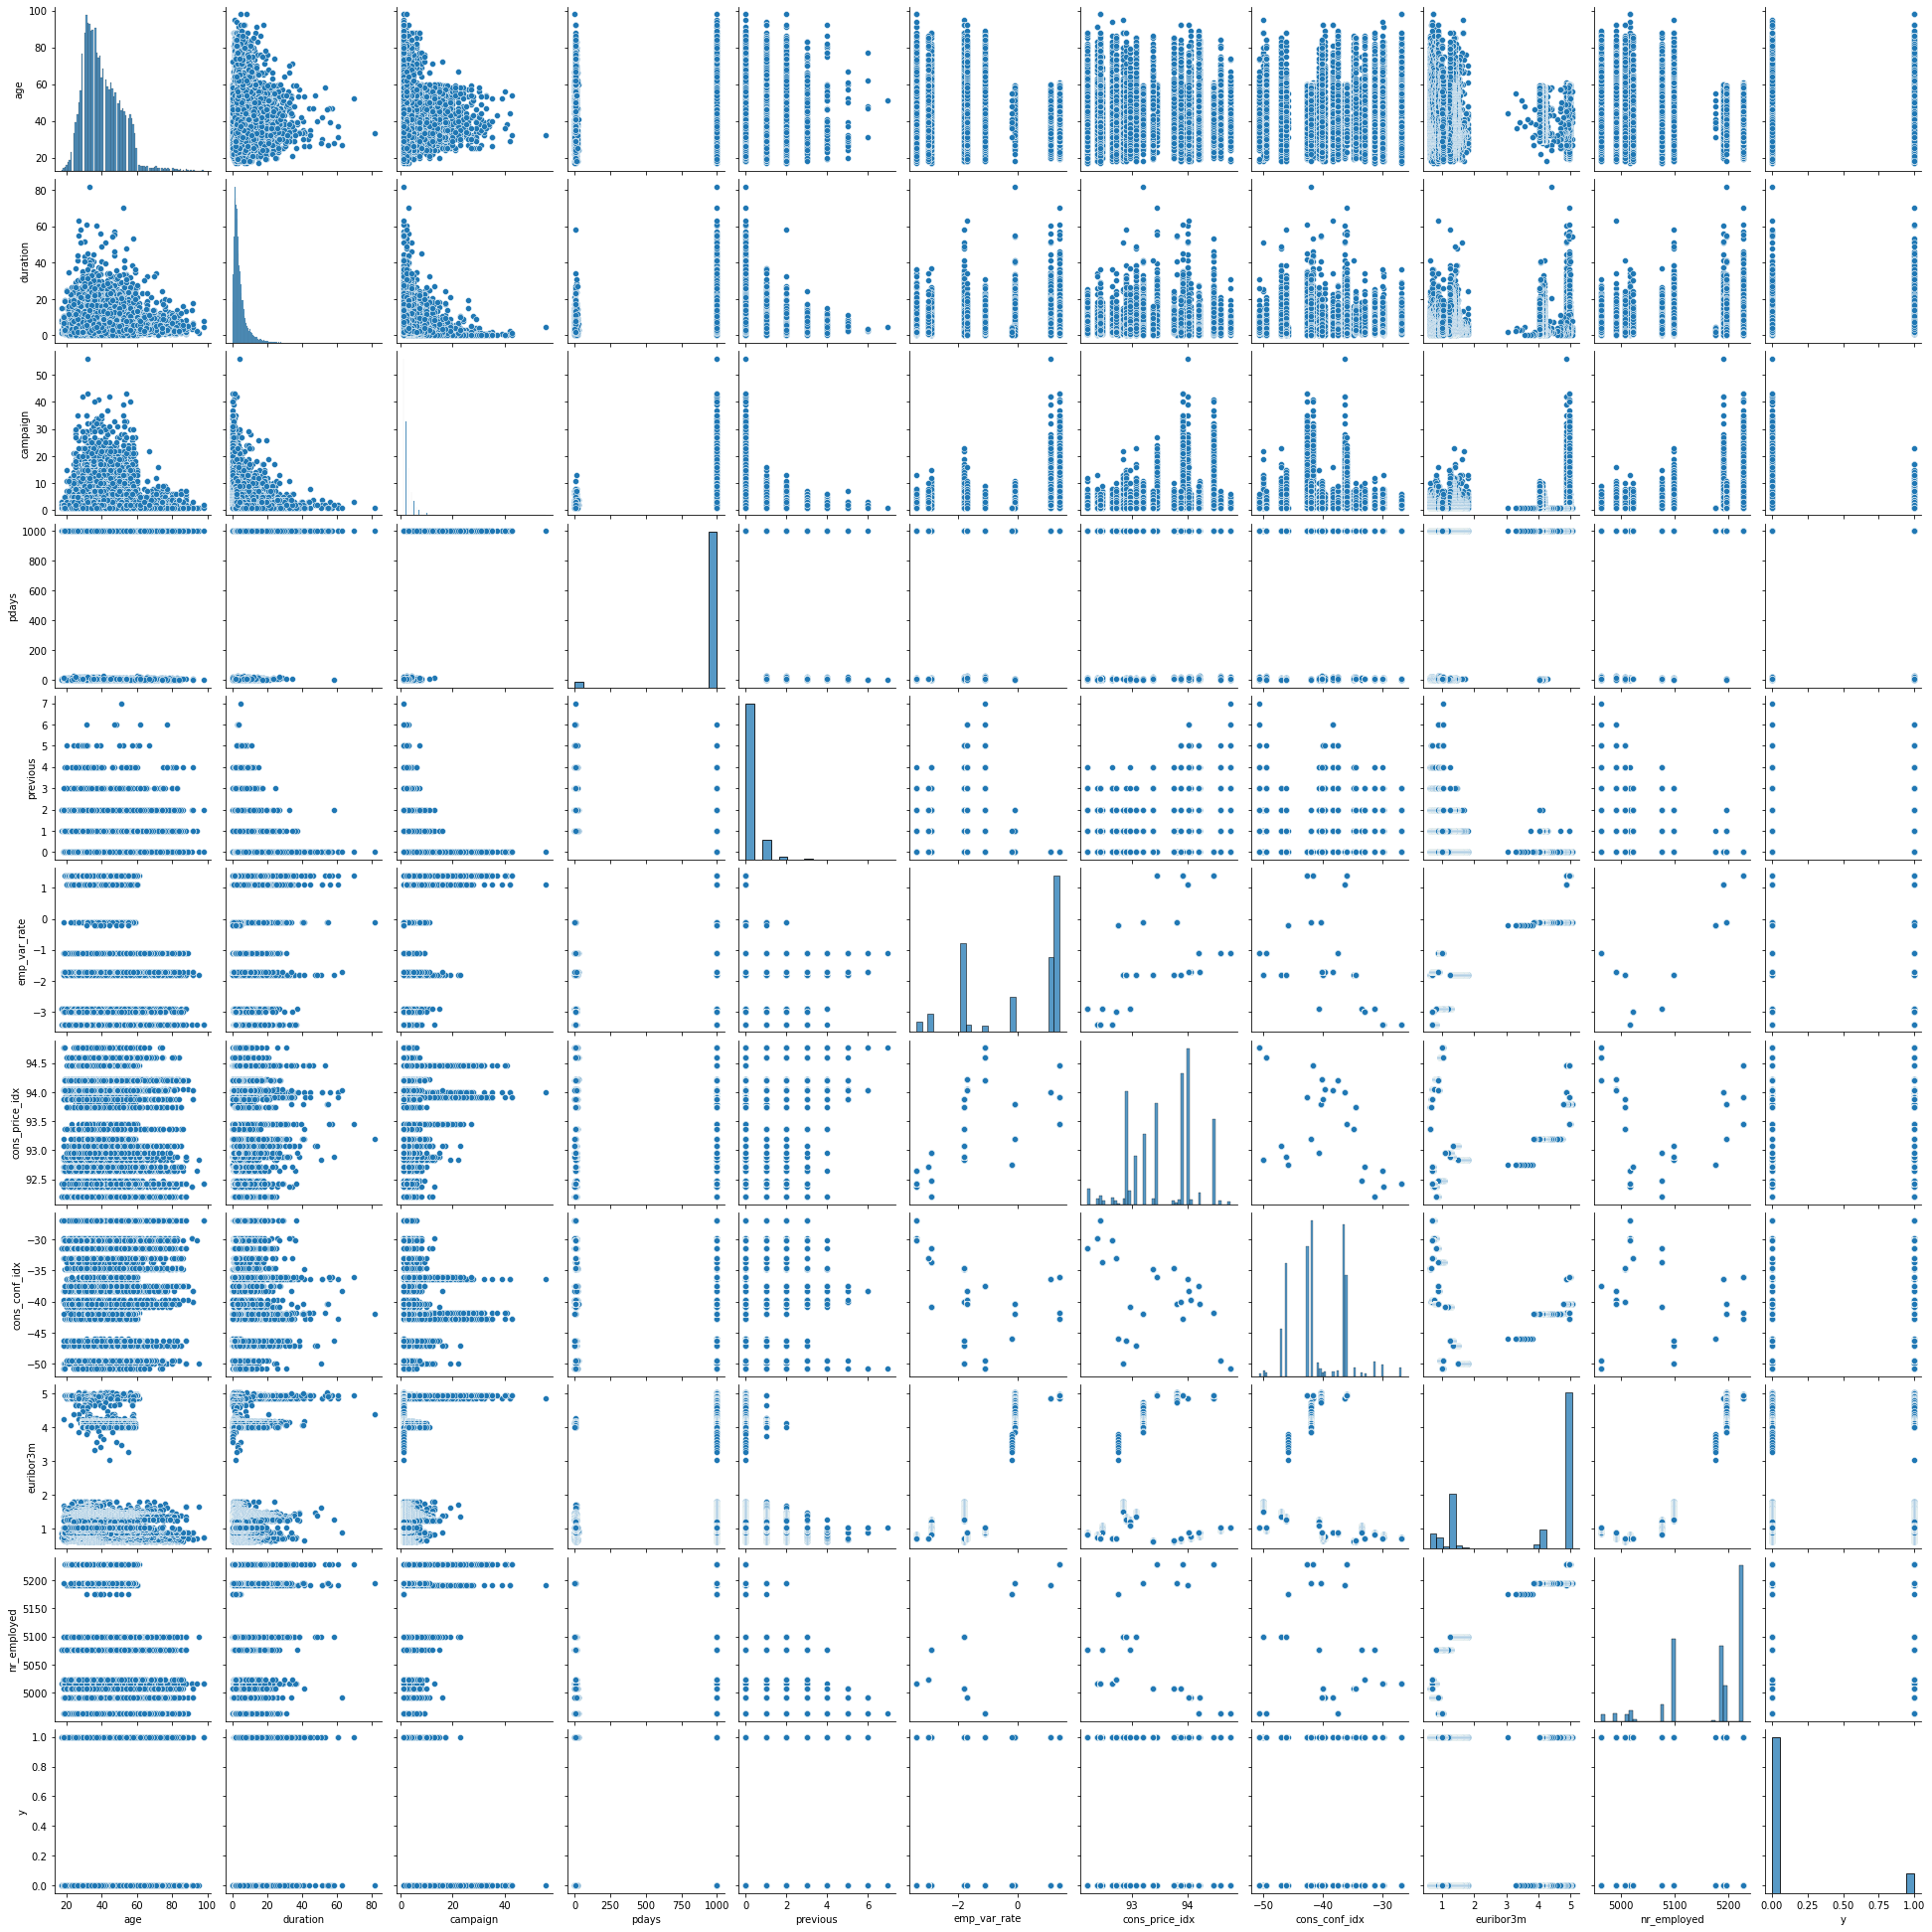

In [24]:
# Plotting the pair plots of the numerical variables of the dataset
sns.pairplot(data=num_df)
plt.show()

### Analyzing the age distribution for Subscribers & Non subscribers.

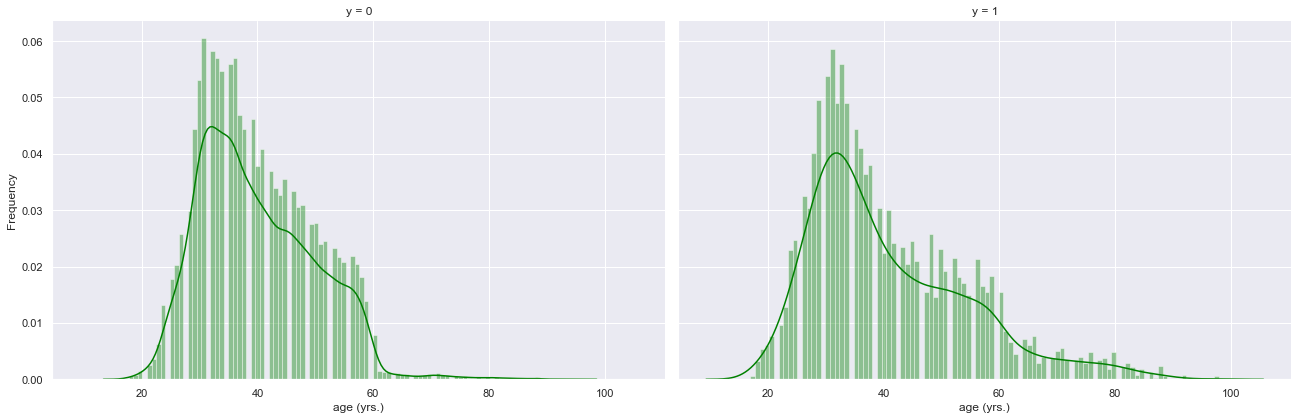

In [37]:
# plotting the histogram of age column for both classes y=0 & y=1
#plt.figure(figsize=(15,10))
sns.set(rc={'figure.figsize':(15,10)})
g = sns.FacetGrid(num_df, col='y',aspect=1.5,height=6)
g.map(sns.distplot,'age', bins=100,color='green')
g.set_axis_labels('age (yrs.)', 'Frequency')
plt.show()


### From the above graph and analysis it is clear that the campaign was well targeted towards people belonging to all the age groups. As expected most of the people who subscribed to the term deposit were  young < 40 yrs. old, which made sense as this segment would be more interested in saving for the future. Surprisingly the ratio (No. of mature adults (> 60 yrs old) subscribers / Total no. of subscribers) was  >>  similar ratio for the Non-subscribers (y=0)


In [53]:
# Grouping the num_df dataframe column by the response variable y & computing the mean & median age of the Subscribers &
# Non subscribers.
df_age = num_df.groupby('y')['age'].agg(['mean','median']).round(2)

In [54]:
# Displaying the age values (yrs.) for both the groups.
df_age

,mean,median
y,,
0,39.91,38
1,40.91,37


### From the above output, it is clear that there are no significant differences between corresponding mean & median ages of the subscribers & non subscribers respectively.

### Analyzing the distribution of last call duration for Subscribers & Non subscribers.

In [55]:
# Grouping the num_df dataframe column by the response variable y & computing the mean & median of duration of last call 
# with the subscribers & Non subscribers.
df_duration = num_df.groupby('y')['duration'].agg(['mean','median']).round(2)

In [56]:
# Displaying the last call duration values (mins.) for both the groups.
df_duration

,mean,median
y,,
0,3.68,2.72
1,9.22,7.48


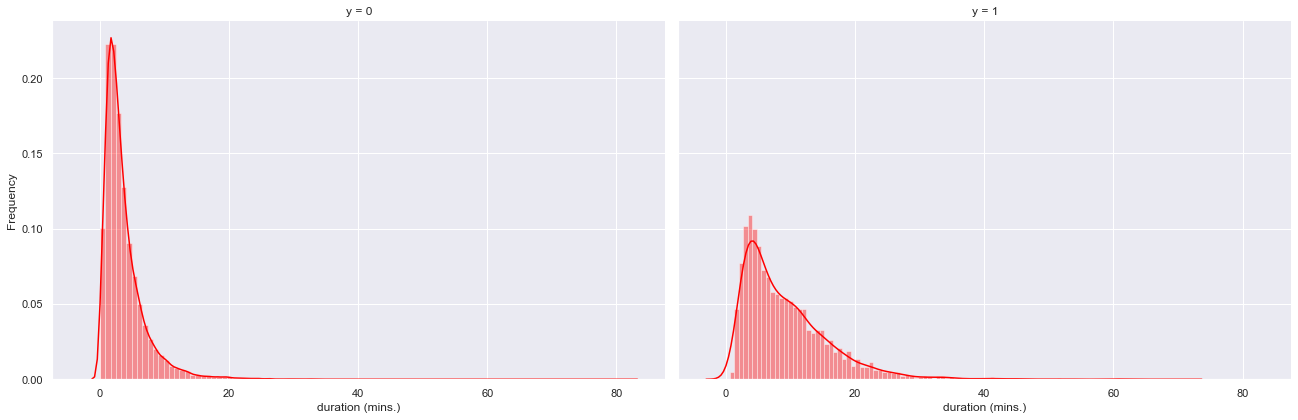

In [38]:
# plotting the histogram of duration column for both classes y=0 & y=1
#plt.figure(figsize=(15,10))
sns.set(rc={'figure.figsize':(15,10)})
g = sns.FacetGrid(num_df, col='y',aspect=1.5,height=6)
g.map(sns.distplot,'duration', bins=100,color='red')
g.set_axis_labels('duration (mins.)', 'Frequency')
plt.show()


### From the above output & graph it is clear that the duration of the last call tends to be comparatively shorter for Non subscribers than that for the subscribers. Also if (duration = 0) => y=0 almost surely. Also after a call, the outcome is more or less known. Thus this variable might be leaking information and might have to be removed from the feature list , in order to build a realistic predictive model.

### Analyzing the distribution of No. of contacts made with Subscribers & Non subscribers for this campaign with a particular client.

In [59]:
# Grouping the num_df dataframe column by the response variable y & computing the mean & median of no. of contacts made 
# with the subscribers & Non subscribers for this campaign.
df_campaign = num_df.groupby('y')['campaign'].agg(['mean','median']).round(2)

In [76]:
# Displaying the no. of contacts made with the clients for this campaign from both the groups.
df_campaign

,mean,median
y,,
0,2.63,2
1,2.05,2


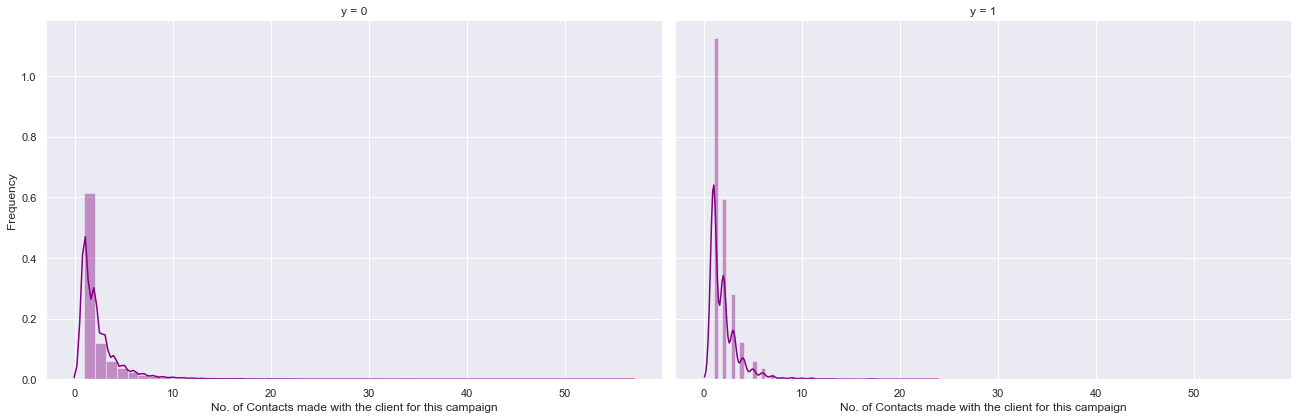

In [39]:
# plotting the histogram of campaign column for both classes y=0 & y=1
#plt.figure(figsize=(20,15))
sns.set(rc={'figure.figsize':(15,10)})
g = sns.FacetGrid(num_df, col='y',aspect=1.5,height=6)
g.map(sns.distplot,'campaign', bins=50,color='purple')
g.set_axis_labels('No. of Contacts made with the client for this campaign', 'Frequency')
plt.show()


### From the above output & plots we can see that on an average , for this campaign,  it took less no. of contacts to be made with a  subscriber than with a non-subscriber. Thus the marketing team tried hard to convert the potential clients to their term deposit customer. The above observation is also obvious as, if a customer has been contacted so many times and has not yet subscribed , It may be difficult to convince him/her.

### Analyzing the distribution of No. of days, since the last contact from a previous campaign,  made with Subscribers & Non subscribers.

In [69]:
# Grouping the num_df dataframe column by the response variable y & computing the mean & median of 
# no. of days, since the last contact from a previous campaign, made with Subscribers & Non subscribers.
df_pdays = num_df.groupby('y')['pdays'].agg(['mean','median']).round(2)

In [70]:
df_pdays

,mean,median
y,,
0,984.11,999
1,792.04,999


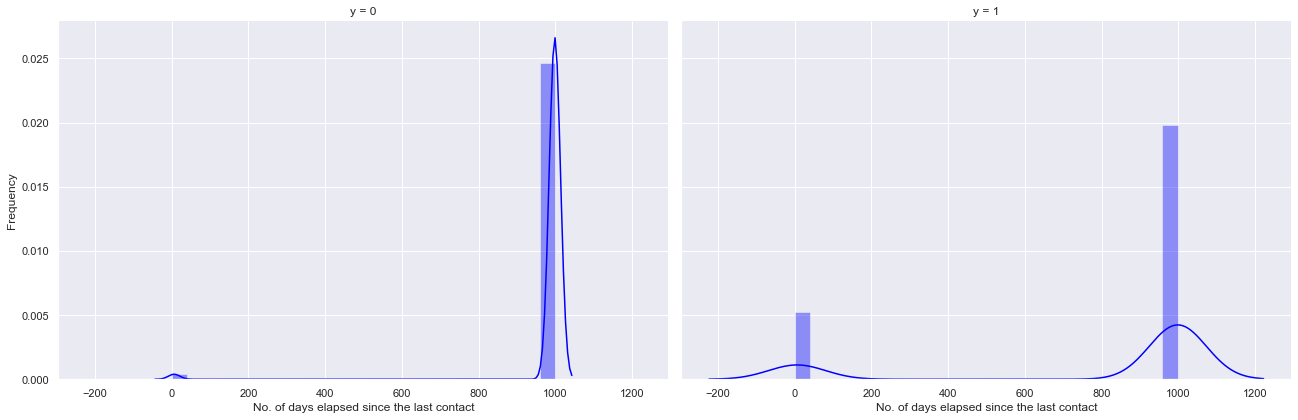

In [40]:
# plotting the histogram of pdays column for both classes y=0 & y=1
#plt.figure(figsize=(20,15))
sns.set(rc={'figure.figsize':(15,10)})
g = sns.FacetGrid(num_df, col='y',aspect=1.5,height=6)
g.map(sns.distplot,'pdays', bins=25,color='blue')
g.set_axis_labels('No. of days elapsed since the last contact', 'Frequency')
plt.show()


### From the above  plot , it is clear that mostly new people (pdays=999) were contacted for this term deposit campaign. Further comparitively more % of customers who were contacted again, subscribed to term deposit than the totally new ones. May be re-contacting more customers from the previous campaigns would have resulted in more sucess. 


### Analyzing the distribution of No. of contacts,  made with Subscribers & Non subscribers, before this campaign with a particular client.

In [80]:
# Grouping the num_df dataframe column by the response variable y & computing the mean & median of 
# no. of contacts made with Subscribers & Non subscribers before this campaign with a particular client.
df_previous = num_df.groupby('y')['previous'].agg(['mean','median']).round(2)

In [81]:
df_previous

,mean,median
y,,
0,0.13,0
1,0.49,0


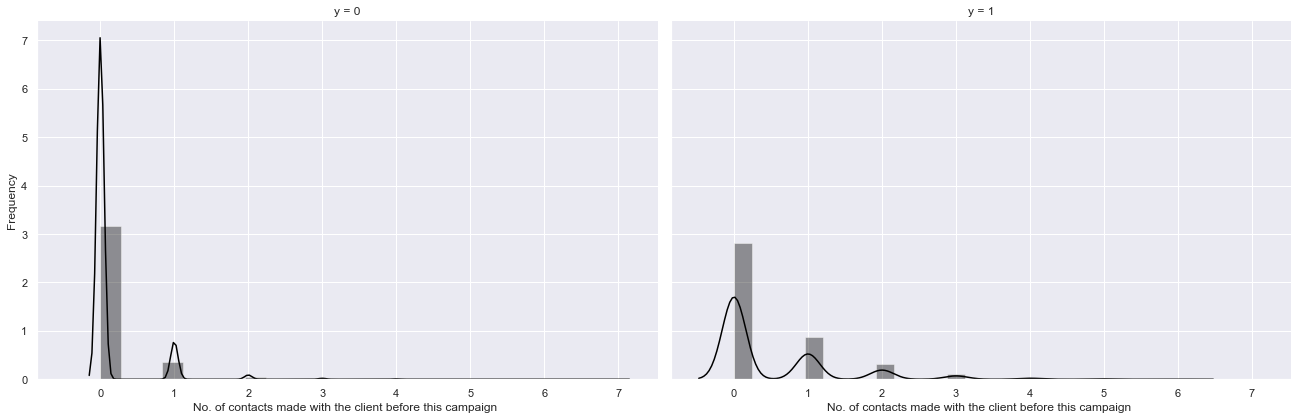

In [41]:
# plotting the histogram of pdays column for both classes y=0 & y=1
#plt.figure(figsize=(20,15))
sns.set(rc={'figure.figsize':(15,10)})
g = sns.FacetGrid(num_df, col='y',aspect=1.5,height=6)
g.map(sns.distplot,'previous', bins=25,color='black')
g.set_axis_labels('No. of contacts made with the client before this campaign ', 'Frequency')
plt.show()


In [86]:
# Computing ratios
df_prev_0 = num_df.groupby('y')['previous'].get_group(0)
ratio_0 = sum(df_prev_0 > 0)/len(df_prev_0)
df_prev_1 = num_df.groupby('y')['previous'].get_group(1)
ratio_1 = sum(df_prev_1 > 0)/len(df_prev_1)

In [89]:
print('The % of Non Subcribers who have been contacted before this current term deposit campaign is: ',ratio_0*100)

The % of Non Subcribers who have been contacted before this current term deposit campaign is:  11.289263434387655


In [90]:
print('The % of Subcribers who have been contacted before this current term deposit campaign is: ',ratio_1*100)

The % of Subcribers who have been contacted before this current term deposit campaign is:  32.30603448275862


### From the above figures & plots, it is evident that comparatively higher % of subscibers have been contacted before this current campaign. As observed earlier as well, may be contacting more no. of previous clients  may have resulted in higher conversion rate.

## Analyzing Socio-economic factors for Non subscribers vs  Subscribers.

In [92]:
# Getting the mean values of various Socio-Economic factors for the Non Subscribers.
ls = ['emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
df_y0 = num_df.groupby('y').get_group(0)
NS = df_y0[ls].mean()
NS.index = ['Mean_'+x for x in ls ]
NS

Mean_emp_var_rate         0.248875
Mean_cons_price_idx      93.603757
Mean_cons_conf_idx      -40.593097
Mean_euribor3m            3.811491
Mean_nr_employed       5176.166600
dtype: float64

In [94]:
# Getting the mean values of various Socio-Economic factors for the Subscribers.
ls = ['emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
df_y1 = num_df.groupby('y').get_group(1)
S = df_y1[ls].mean()
S.index = ['Mean_'+x for x in ls ]
S

Mean_emp_var_rate        -1.233448
Mean_cons_price_idx      93.354386
Mean_cons_conf_idx      -39.789784
Mean_euribor3m            2.123135
Mean_nr_employed       5095.115991
dtype: float64

### From above, we can see subscriptions were made to term deposits, when the underlying economic conditions were better on average.

### Checking for outliers in various numerical columns

In [3]:
#Standardizing the numerical columns to vizualize their outliers
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_temp = num_df.drop(columns=['y'])
X_std = std.fit_transform(X_temp)

In [4]:
# Converting the standardized array back to dataframe.
num_std = pd.DataFrame(X_std,columns=X_temp.columns,index=num_df.index)

In [5]:
# Appending the class label column y
num_std['y'] = num_df['y']

In [6]:
num_std.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1.533034,0.010466,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0
1,1.628993,-0.422277,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0
2,-0.290186,-0.123754,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0
3,-0.002309,-0.413021,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0
4,1.533034,0.188654,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0


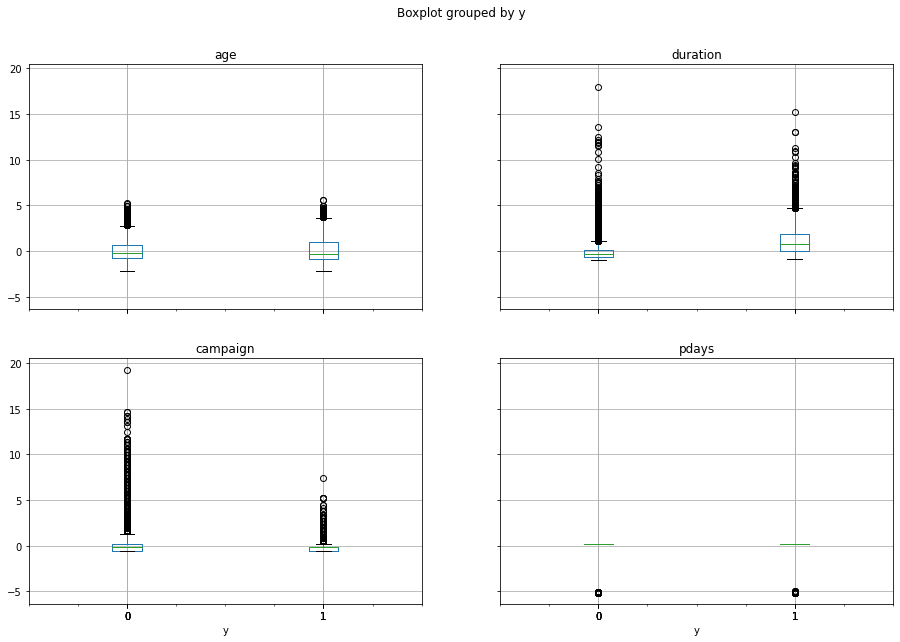

In [29]:
# Plotting boxplots of age, duration, campaign, pdays columns for outlier detection
num_std.boxplot(column = ['age','duration','campaign','pdays'],by='y',figsize=(15,10))
#plt.title('Boxplot of age column grouped by Class labels')
plt.show()

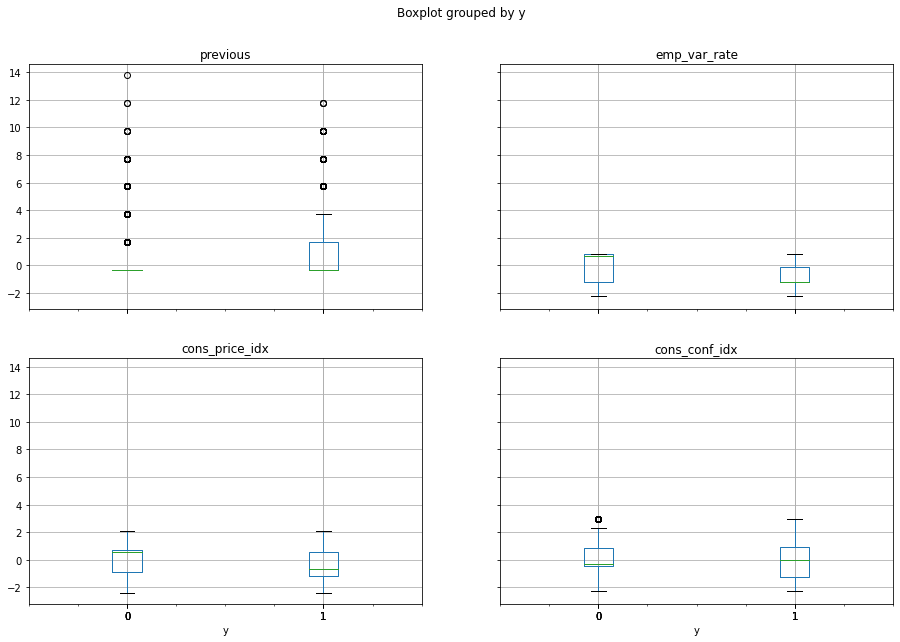

In [30]:
# Plotting boxplots of previous, emp_var_rate, cons_price_idx, cons_conf_idx columns for outlier detection
num_std.boxplot(column = ['previous','nr_employed','cons_price_idx','cons_conf_idx'],by='y',figsize=(15,10))
#plt.title('Boxplot of age column grouped by Class labels')
plt.show()

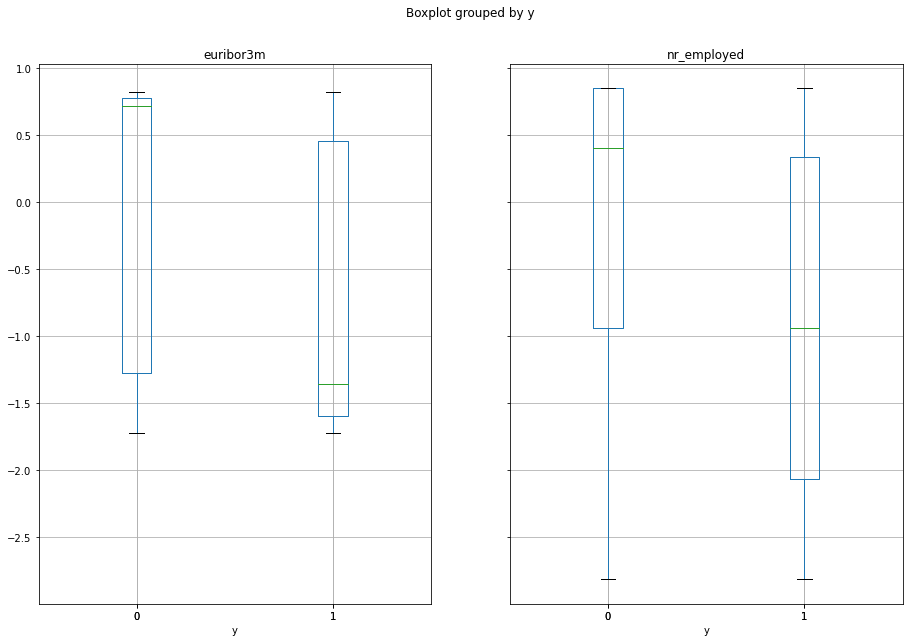

In [31]:
# Plotting boxplots of euribor3m, nr_employed columns for outlier detection
num_std.boxplot(column = ['euribor3m','nr_employed',],by='y',figsize=(15,10))
#plt.title('Boxplot of age column grouped by Class labels')
plt.show()

### From the above graphs it is evident that except for socio-economic variables, all the columns have outliers.

### Storing the Numerical Dataframe to a csv file.

In [112]:
# Saving the Numerical Dataframe to CSV File
num_df.to_csv('Num_df.csv',index=False)